| [Intro Octave 1](intro_octave_1.ipynb)| Revenir à la [page déroulement](../README.ipynb) |---|
|-------------|---|---|

---
# Intro. Octave 2 : SUJET ( -> [Corrigé](./intro_octave_2_corr.ipynb))
--- 


## Produit de signaux = élément par élément

Comprenez bien que l'on a dû multiplier deux signaux entre eux avec le produit .* élément par élément.
> `f= @(t,F) u(t) .* sin(2*pi*F*t) * A;`

Car 
- l'opérande de gauche `u(t)` est un vecteur ligne (1 x n)
- l'opérande de droite `sin(2*pi*F*t) * A` est de même (1 x n)

Donc le produit matriciel est mal défini car (1 x n) * (1 x n) ne fonctionne pas
                                       

In [10]:
gauche = u(t);
droite = sin(2*pi*F*t) * A;
gauche * droite

error: operator *: nonconformant arguments (op1 is 1x901, op2 is 1x901)


On demande alors un produit élément par élément entre ces deux vecteurs ** qui doivent être de même taille ! **

L'équivalent d'une boucle for en ada 
```ADA
for I in 1..901 loop
    mult(I) = gauche(I) * droite(I)
end loop;
```
Ce fait en demandant la version "élément par élément" de l'opérateur *

Ce qui donne en utilisant subplot pour faire trois graphiques superposés :


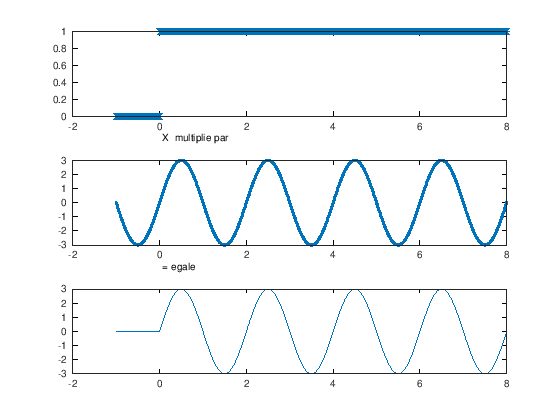

In [11]:
% subplot divise la fenêtre en plusieurs rangées et colonne sde graphiques
subplot(311) % 3 rangées, 1 colone, on se met dans le graphique 1 (en haut)
plot(t,gauche,'*');
text(0,-0.25, " X  multiplie par")
subplot(312) % 3 rangées, 1 colone, on se met dans le graphique 2 (au milieu)
plot(t,droite,'.');
text(0,-4.5, " = egale")
subplot(313) % 3 rangées, 1 colone, on se met dans le graphique 3 (en bas)
plot(t,gauche.*droite);


---
#  Séance 2 : équivalent exo 4 du sujet standard
---

- Afficher une somme de signaux correspondant à une série de Fourier
- Calculer numériquement une intégrale (valeur moyenne) : **Test moodle**

## Choses à faire pour cette séance
---

- installer octave sur son PC et apporter son PC si possible ;
- (en option) installer anaconda (distribution de python) utile pour les notebooks ;
- Reprendre mon script en un script au format GroupeA_NOM1_NOM2.m pour tracer la somme de la composante continue (utiliser la fonction `constante` de mon script) ajoutée à la fondamentale ajoutée au premier harmonique d'une des séries des [Exos 1.3 des SdF](https://moodle.insa-toulouse.fr/mod/resource/view.php?id=24741#section.5.9) et de l'[exo 7 des SdF](https://moodle.insa-toulouse.fr/mod/resource/view.php?id=24741#section.5.9)



### Réfléchir à un programme ADA capable de calculer l'intégrale d'un signal représenté par un tableau valeurs : intégrale de Rieman



![](integrale_Riemann.png)

Ne pas confondre 
 * la primitive $F$ d'une fonction $f$ qui dépend d'une borne $F : a \mapsto \int_{0}^{a}f(t)d(t)$ : Il s'agit ici de la primitive qui s'annule en 0 (prisée des traiteuses du signal et des automaticiennes, car on considère des signaux causaux). Une manière d'obtenir cette fonction primitive dans le cas discret (on ne dispose que d'échantillons de valeurs à des instants donnés : ce sont donc des suites numériques) est donnée dans l' [exercice 2.1 page 23 du poly de filtrage numérique](https://github.com/balaise31/Signal/blob/master/discret/poly/main.pdf#page=23)
* une intégrale qui est un nombre réel (lorsqu'elle converge) :
$\int_a^b f(t) dt = F(a) - F(b) = \lim_{dx\to 0}\sum_{k=0}^N f(k.dx).dx$


## Calculez l'intégrale demandée
---

Il faudra déposer votre fichier matlab capable de calculer une intégrale (par exemple  $\int\limits_{t=0}^{\pi}tcos(2t)dt$ ) [ici sur moodle](https://moodle.insa-toulouse.fr/mod/quiz/view.php?id=24772) contenant votre travail précédent (affichage des composantes) et ce calcul. Même si cela est sous la forme d'un QCM, il s'agit d'un dépôt de réponse et de fichier.

Créez la fonction `f` à intégrer, sous la forme d'une fonction en ligne, en vous demandant si le produit entre `t` et `cos(2*t)` doit être matriciel `*` ou élément par élément `.*` :

In [3]:
f = @(t) cos(2*t) *  t

f =

@(t) cos (2 * t) * t



Tester si cette fonction est bien vectorisée en calculant `f` pour tout les instants contenus dans le vecteur `t`. Stockez-le dans un vecteur `sig_f`.

La commande `sig_f = f(t)` doit donc fonctionner et vous devez observer dans le ***workspace*** un vecteur de valeurs.

Le but est maintenant de calculer la somme des valeurs de `sig_f` et de multiplier par $T_e$ pour avoir $\sum_{k=0}^N f(k.dx).dx$ avec $dx=T_e$. Vous pouvez utiliser une boucle for et une variable de cumulation `somme`, ou simplement appeler la fonction `sum` de matlab.


## Les exemples suivants peuvent vous inspirer et vous aider
--- 

Vous pouvez utiliser la commande `help` pour voir comment utiliser une fonction et avoir des exemples :
``` octave
   help for

   help sum
```
En complément voici des exemples proches de ce qu'il faut faire 

## Exemple d'utilisation de `sum` : la somme partielle d'une suite géométrique

Rappelons que la formule de répétition causale $f_r$ d'un signal impulsion $f$ répété N fois avec une période $T_0$ donnant la transformée de Laplace est :

$F_r(p) = F(p) . (e^{-0.Te.p} + \ldots + e^{-N.Te.p})$

où l'on voit que la somme des retards est une suite géométrique de raison $r=e^{-T_e.p}\in\mathrm{C}$.

Cette **série** géométrique (on parle donc de la suite des sommes partielles) peut converger vers $S_N=\frac{r^{N+1}-r^0}{r-1}\underset{N\to+\infty}{\rightarrow}\frac{1}{1-r}$ ssi $|r|<1$ ce qui impose certaines choses sur la valeur de p.

Ce qui donne pour une répétition infinie :

$F_r(p) = F(p) . \frac{1}{1 - e^{-Te.p}}$


Le programme si dessous calcule une somme partielle pour une valeur de $p$ et $T_0$ donnée :

In [35]:
% exemple de l'utilisation de sum pour calculer une somme partielle de suite géométrique
Te=1;
Tau = 0:Te:3*Te % les retards
p = 1+i; % une variable des valeurs possible de la variable de Laplace
Laplace = exp(-Tau*p) % Laplace des  retards pour une valeur de p
Somme = sum(Laplace) % Laplace de la somme des retards
% on vérifie avec la formule de somme partielle
(exp(-4*p)-exp(0*p))/(exp(-p)-1)

Tau =

   0   1   2   3

Laplace =

 Columns 1 through 3:

   1.00000 - 0.00000i   0.19877 - 0.30956i  -0.05632 - 0.12306i

 Column 4:

  -0.04929 - 0.00703i

Somme =  1.09316 - 0.43965i
ans =  1.09316 - 0.43965i


## Exemple d'utilisation de `for` : calcul de factorielle

Programme un peu stupide pour calculer la factorielle : on stocke dans un tableau `v` les valeurs de 1 à 4  et ensuite on multiplie chaque élément de ce tableau. 

In [23]:
% exemple de boucle dans un tableau pour calculer une factorielle
v=1:4
factorielle = 1 ;
% exemple pour boucler dans un tableau
for indice = 1:length(v)
    factorielle = factorielle * v(indice) ;
end

factorielle % sans ; pour afficher

v =

   1   2   3   4

factorielle =  24
